In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
from pathlib import Path
import preproc as pp

import numpy as np
import tensorflow as tf

version = "v2"
augp = Path("../scratch").joinpath("train_augmented_" + version)
modelp = Path("../scratch").joinpath("models")

train_ir, test_ir = pp.load_data(val_size=0)
train_aug, test_aug = pp.load_aug_data(augp, train_ir.element_spec, test_ind=[3])

2023-02-28 20:56:07.006518: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-02-28 20:56:33.377056: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-02-28 20:56:33.725096: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:31:00.0 name: NVIDIA A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.41GiB deviceMemoryBandwidth: 1.41TiB/s
2023-02-28 20:56:33.725125: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-02-28 20:56:33.829710: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-02-28 20:56:33.829786: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas

# 4. Simple

In [3]:
inputs = tf.keras.layers.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(
    filters=64
    , kernel_size=3
    , strides=1
    , padding="same"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(inputs)
x = tf.keras.layers.Conv2D(
    filters=64
    , kernel_size=3
    , strides=1
    , padding="same"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.Conv2D(
    filters=64
    , kernel_size=2
    , strides=2
    , padding="valid"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.BatchNormalization(scale=False)(x)
x = tf.keras.layers.Conv2D(
    filters=128
    , kernel_size=3
    , strides=1
    , padding="same"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.Conv2D(
    filters=128
    , kernel_size=2
    , strides=2
    , padding="valid"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.BatchNormalization(scale=False)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(
    1048
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.BatchNormalization(scale=False)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(
    1048
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.BatchNormalization(scale=False)(x)
x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
net = tf.keras.Model(inputs=inputs, outputs=outputs)
net.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        16448     
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        192       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         65664 

2023-02-26 19:40:32.302280: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-02-26 19:40:32.302305: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-02-26 19:40:32.302329: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2023-02-26 19:40:32.308123: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.11.1
2023-02-26 19:40:32.438354: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-02-26 19:40:32.438469: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/50


2023-02-26 19:40:33.096117: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-02-26 19:40:33.117627: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3000000000 Hz
2023-02-26 19:40:33.218097: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-02-26 19:40:33.892950: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2023-02-26 19:40:38.561938: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


  1/844 [..............................] - ETA: 1:57:51 - loss: 3.6982 - accuracy: 0.1055

2023-02-26 19:40:40.734180: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


  3/844 [..............................] - ETA: 7:57 - loss: 3.6671 - accuracy: 0.1035  

2023-02-26 19:40:41.048583: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-02-26 19:40:41.048615: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-02-26 19:40:41.847120: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-02-26 19:40:41.847614: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-02-26 19:40:41.904080: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 286 callback api events and 274 activity events. 
2023-02-26 19:40:41.914871: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-02-26 19:40:41.944246: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: simple_logs/train/plugins/profile/2023_02_26_19_40_41
2023-02-26 19:40:41.965089: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzip

844/844 [==============================] - 30s 25ms/step - loss: 1.1608 - accuracy: 0.6492 - val_loss: 0.2557 - val_accuracy: 0.9233
Epoch 2/50
844/844 [==============================] - 25s 23ms/step - loss: 0.2488 - accuracy: 0.9234 - val_loss: 0.2057 - val_accuracy: 0.9349
Epoch 3/50
844/844 [==============================] - 24s 23ms/step - loss: 0.1778 - accuracy: 0.9454 - val_loss: 0.1131 - val_accuracy: 0.9639
Epoch 4/50
844/844 [==============================] - 24s 23ms/step - loss: 0.1419 - accuracy: 0.9560 - val_loss: 0.2500 - val_accuracy: 0.9237
Epoch 5/50
844/844 [==============================] - 24s 23ms/step - loss: 0.1211 - accuracy: 0.9626 - val_loss: 0.2573 - val_accuracy: 0.9219
Epoch 6/50
844/844 [==============================] - 24s 23ms/step - loss: 0.1094 - accuracy: 0.9658 - val_loss: 0.0870 - val_accuracy: 0.9724
Epoch 7/50
844/844 [==============================] - 24s 23ms/step - loss: 0.0966 - accuracy: 0.9701 - val_loss: 0.0803 - val_accuracy: 0.9743
Epo

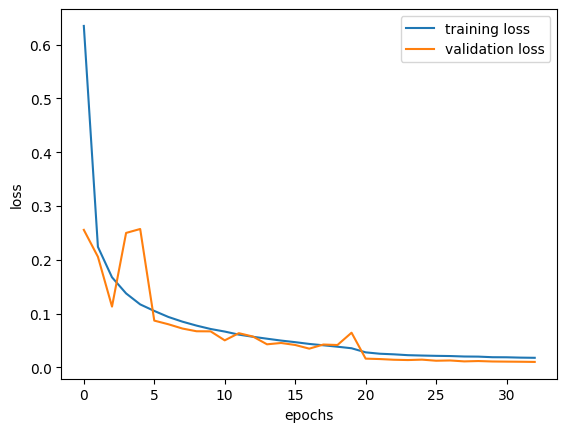

In [4]:
train_shape = tf.data.experimental.cardinality(train_aug).numpy()
val_size = 0.2

splitter = train_aug.shuffle(100000, reshuffle_each_iteration=True)
val_ds = splitter.take(train_shape * val_size).batch(512)
train_ds = splitter.skip(train_shape * val_size).batch(512)

net.compile(
    loss='categorical_crossentropy'
    , optimizer=tf.keras.optimizers.SGD(nesterov=True, momentum=0.9)
    # , optimizer="adam"
    , metrics=["accuracy"]
)

history = net.fit(
    train_ds
    , validation_data=val_ds
    , epochs=50
    , callbacks=[
        tf.keras.callbacks.EarlyStopping(min_delta=0.001, patience=5, restore_best_weights=True, monitor="val_loss")
        , tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3, min_lr=1e-5)
        , tf.keras.callbacks.TensorBoard(log_dir="simple_logs", histogram_freq=1, write_graph=True, write_images=True)
    ]
)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [7]:
augpv1 = Path("../scratch").joinpath("train_augmented_v1")
# epochs=1
train_augv1, test_augv1 = pp.load_aug_data(augpv1.resolve(), train_ir.element_spec, test_ind=[1,2,3,4,6,7,8,9])
_ = net.fit(
    train_ir.concatenate(train_augv1).shuffle(100000, reshuffle_each_iteration=True).batch(512)
    , validation_data=test_augv1.batch(512)
    , epochs=1
)

352/352 [==============================] - 18s 45ms/step - loss: 0.0585 - accuracy: 0.9840 - val_loss: 0.0280 - val_accuracy: 0.9920


In [8]:
net.evaluate(train_ir.batch(512)), net.evaluate(test_ir.batch(512))

20/20 [==============================] - 0s 5ms/step - loss: 0.0348 - accuracy: 0.9895


([0.02425846830010414, 0.9926499724388123],
 [0.034818291664123535, 0.9894999861717224])

In [ ]:
net.evaluate(train_ds), net.evaluate(val_ds), net.evaluate(test_aug.batch(512))

 33/844 [>.............................] - ETA: 11s - loss: 0.0244 - accuracy: 0.9917

In [10]:
net.save(modelp.joinpath("simple.tmp."+version+".h5").resolve().as_posix(), save_format="h5")

# 5. Simple v2

In [14]:
inputs = tf.keras.layers.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(
    filters=64
    , kernel_size=3
    , strides=1
    , padding="same"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(inputs)
x = tf.keras.layers.Conv2D(
    filters=64
    , kernel_size=3
    , strides=1
    , padding="same"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.Conv2D(
    filters=64
    , kernel_size=5
    , strides=2
    , padding="valid"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.BatchNormalization(scale=False)(x)
x = tf.keras.layers.Conv2D(
    filters=128
    , kernel_size=3
    , strides=1
    , padding="same"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.Conv2D(
    filters=128
    , kernel_size=3
    , strides=1
    , padding="same"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.Conv2D(
    filters=128
    , kernel_size=5
    , strides=2
    , padding="valid"
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.BatchNormalization(scale=False)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(
    256
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.BatchNormalization(scale=False)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(
    256
    , activation="relu"
    , use_bias=True
    , kernel_initializer="he_uniform"
    , bias_initializer="zeros"
)(x)
x = tf.keras.layers.BatchNormalization(scale=False)(x)
x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
net = tf.keras.Model(inputs=inputs, outputs=outputs)
net.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 64)        102464    
_________________________________________________________________
batch_normalization_12 (Batc (None, 12, 12, 64)        192       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 12, 12, 128)       1475

2023-02-28 21:31:27.406544: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-02-28 21:31:27.406569: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-02-28 21:31:28.063933: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-02-28 21:31:28.064028: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/50
  2/844 [..............................] - ETA: 6:10 - loss: 3.6794 - accuracy: 0.0977   

2023-02-28 21:31:34.396628: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-02-28 21:31:34.396656: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


  9/844 [..............................] - ETA: 2:53 - loss: 3.4965 - accuracy: 0.1241

2023-02-28 21:31:35.562674: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-02-28 21:31:35.563021: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-02-28 21:31:35.628516: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 310 callback api events and 298 activity events. 
2023-02-28 21:31:35.641233: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-02-28 21:31:35.672996: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: simplev2_logs/train/plugins/profile/2023_02_28_21_31_35
2023-02-28 21:31:35.692531: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to simplev2_logs/train/plugins/profile/2023_02_28_21_31_35/erc-hpc-comp034.trace.json.gz
2023-02-28 21:31:35.714644: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating direct

844/844 [==============================] - 29s 28ms/step - loss: 1.0865 - accuracy: 0.6707 - val_loss: 0.1950 - val_accuracy: 0.9404
Epoch 2/50
844/844 [==============================] - 27s 26ms/step - loss: 0.1267 - accuracy: 0.9631 - val_loss: 0.1042 - val_accuracy: 0.9692
Epoch 3/50
844/844 [==============================] - 27s 26ms/step - loss: 0.0855 - accuracy: 0.9756 - val_loss: 0.0717 - val_accuracy: 0.9785
Epoch 4/50
844/844 [==============================] - 26s 25ms/step - loss: 0.0673 - accuracy: 0.9805 - val_loss: 0.0624 - val_accuracy: 0.9810
Epoch 5/50
844/844 [==============================] - 26s 25ms/step - loss: 0.0560 - accuracy: 0.9837 - val_loss: 0.0523 - val_accuracy: 0.9847
Epoch 6/50
844/844 [==============================] - 26s 25ms/step - loss: 0.0492 - accuracy: 0.9856 - val_loss: 0.0545 - val_accuracy: 0.9832
Epoch 7/50
844/844 [==============================] - 26s 25ms/step - loss: 0.0421 - accuracy: 0.9877 - val_loss: 0.0424 - val_accuracy: 0.9871
Epo

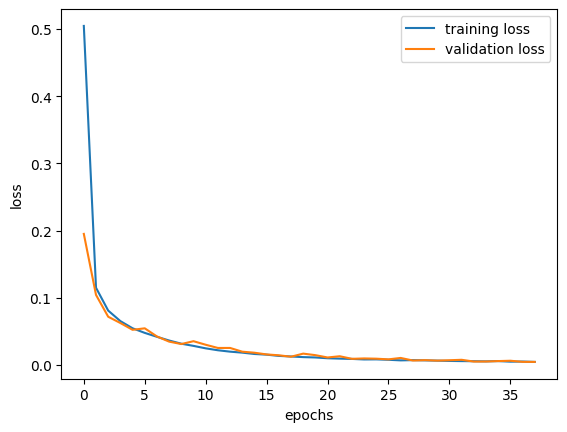

In [15]:
train_shape = tf.data.experimental.cardinality(train_aug).numpy()
val_size = 0.2

splitter = train_aug.shuffle(100000, reshuffle_each_iteration=True)
val_ds = splitter.take(train_shape * val_size).batch(512)
train_ds = splitter.skip(train_shape * val_size).batch(512)

net.compile(
    loss='categorical_crossentropy'
    # , optimizer=tf.keras.optimizers.SGD(nesterov=True, momentum=0.9)
    , optimizer="adam"
    , metrics=["accuracy"]
)

history = net.fit(
    train_ds
    , validation_data=val_ds
    , epochs=50
    , callbacks=[
        tf.keras.callbacks.EarlyStopping(min_delta=0.001, patience=5, restore_best_weights=True, monitor="val_loss")
        # , tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3, min_lr=1e-5)
        , tf.keras.callbacks.TensorBoard(log_dir="simplev2_logs", histogram_freq=1, write_graph=True, write_images=True)
    ]
)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [18]:
augpv1 = Path("../scratch").joinpath("train_augmented_v1")
# epochs=1
train_augv1, test_augv1 = pp.load_aug_data(augpv1.resolve(), train_ir.element_spec, test_ind=[1,2,3,4,6,7,8,9])
_ = net.fit(
    train_ir.concatenate(train_augv1).shuffle(100000, reshuffle_each_iteration=True).batch(512)
    , validation_data=test_augv1.batch(512)
    , epochs=1
)

352/352 [==============================] - 22s 57ms/step - loss: 0.0212 - accuracy: 0.9946 - val_loss: 0.0124 - val_accuracy: 0.9962


In [19]:
net.evaluate(train_ir.batch(512)), net.evaluate(test_ir.batch(512))

20/20 [==============================] - 0s 6ms/step - loss: 0.0165 - accuracy: 0.9947


([0.004972307942807674, 0.9985833168029785],
 [0.016536638140678406, 0.994700014591217])

In [20]:
net.evaluate(train_ds), net.evaluate(val_ds), net.evaluate(test_aug.batch(512))

118/118 [==============================] - 2s 16ms/step - loss: 0.0573 - accuracy: 0.9838


([0.025584379211068153, 0.9916828870773315],
 [0.029219167307019234, 0.9905555844306946],
 [0.05733729526400566, 0.9838333129882812])

In [21]:
net.save(modelp.joinpath("simple.v2."+version+".h5").resolve().as_posix(), save_format="h5")